In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
# import data & check head
results = pd.read_csv(r'Bundesliga_Results.csv')
results.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [5]:
# check botttom 20 rows (commented out)
# results[-20:]

In [6]:
# create dataframe where half-time results are NaN (before season 1995-96) & check bottom 5 rows
results_nan = results[results.isna().any(axis=1)]
results_nan[-5:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
607,D1,17/06/95,Karlsruhe,Bochum,2,2,D,NaN,NaN,NaN,1994-95
608,D1,17/06/95,Leverkusen,Dresden,2,2,D,NaN,NaN,NaN,1994-95
609,D1,17/06/95,Schalke 04,Freiburg,1,2,A,NaN,NaN,NaN,1994-95
610,D1,17/06/95,Stuttgart,Duisburg,3,1,H,NaN,NaN,NaN,1994-95
611,D1,17/06/95,Uerdingen,M'gladbach,3,2,H,NaN,NaN,NaN,1994-95


In [7]:
# create dataframe without NaN values (starting season 1995-96)
# this is the dataframe used in the following analysis
r = results.dropna()

In [48]:
# set half-time goals to integer (before: float) & print head 5 rows
r['HTHG'] = r['HTHG'].astype(int)
r['HTAG'] = r['HTAG'].astype(int)
r.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,11/8/1995,Dortmund,Kaiserslautern,1,1,D,0,0,D,1995-96
1,D1,11/8/1995,Stuttgart,Uerdingen,0,0,D,0,0,D,1995-96
2,D1,11/8/1995,Werder Bremen,Dusseldorf,1,1,D,1,1,D,1995-96
3,D1,12/8/1995,Bayern Munich,Hamburg,3,2,H,1,1,D,1995-96
4,D1,12/8/1995,Ein Frankfurt,Karlsruhe,2,2,D,1,1,D,1995-96


In [51]:
# import data this season & check head
results2 = pd.read_csv(r'Ergebnisse 2019 bis Spieltag 17.csv', sep =';', decimal=",")
results3 = pd.read_csv(r'Spielergebnisse 2018-19.csv', sep =';', decimal=",")
results2.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,D1,16.08.2019,Bayern Munich,Hertha,2,2,D,1,2,A
1,D1,17.08.2019,Dortmund,Augsburg,5,1,H,1,1,D
2,D1,17.08.2019,Freiburg,Mainz,3,0,H,0,0,D
3,D1,17.08.2019,Leverkusen,Paderborn,3,2,H,2,2,D
4,D1,17.08.2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,0,1,A


In [52]:
# create list of dates to adjust format
date_list = []
for date in results2['Date']:
    date_list.append(date.replace('.', '/'))
for date in results3['Date']:
    date_list.append(date.replace('.', '/'))

In [55]:
#Add column 'Season' to results2 and results3

results2['Season'] = '2019-20'
results3['Season'] = '2018-19'

results2['Season'] = results2['Season'].astype(str)
results3['Season'] = results3['Season'].astype(str)


In [12]:
# concatenate both df & reset index
r = pd.concat([r, results2, results3])
r.reset_index(inplace=True, drop=True)
r

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,11/8/1995,Dortmund,Kaiserslautern,1,1,D,0,0,D,1995-96
1,D1,11/8/1995,Stuttgart,Uerdingen,0,0,D,0,0,D,1995-96
2,D1,11/8/1995,Werder Bremen,Dusseldorf,1,1,D,1,1,D,1995-96
3,D1,12/8/1995,Bayern Munich,Hamburg,3,2,H,1,1,D,1995-96
4,D1,12/8/1995,Ein Frankfurt,Karlsruhe,2,2,D,1,1,D,1995-96
...,...,...,...,...,...,...,...,...,...,...,...
7492,D1,18.05.2019,Mainz,Hoffenheim,4,2,H,0,2,A,2018-19
7493,D1,18.05.2019,M'gladbach,Dortmund,0,2,A,0,1,A,2018-19
7494,D1,18.05.2019,Schalke 04,Stuttgart,0,0,D,0,0,D,2018-19
7495,D1,18.05.2019,Werder Bremen,RB Leipzig,2,1,H,1,0,H,2018-19


In [56]:
# create list with all seasons (1995-96 until 2018-19); sort in ascending order
allssn = list(set(r['Season']))
allssn.sort()
r['Season']

0       1995-96
1       1995-96
2       1995-96
3       1995-96
4       1995-96
         ...   
7492    2018-19
7493    2018-19
7494    2018-19
7495    2018-19
7496    2018-19
Name: Season, Length: 7497, dtype: object

In [57]:
# create dictionary with season as keys and list of teams in the season as value; check if list hass 18 teams
tms_dict = dict()
for ssn in allssn:
    tms = list(set(r[r['Season'] == ssn]['HomeTeam']))
    if len(tms) != 18: print('Not 18 teams')
    tms_dict.update({ssn:tms})

In [59]:
tbl_dict = dict()

# loop through each season in tms_dict (gives list of teams for specific season)
for ssn, tms in tms_dict.items():

    # create temporary list for each variable
    tmp_pnts = list()
    tmp_games = list()
    tmp_win = list()
    tmp_draw = list()
    tmp_loose = list()
    tmp_goalsfor = list()
    tmp_goalsagainst = list()
    tmp_goaldifference = list()


    # loop through all teams in list tms_season x; set points & games variable to 0;
    for tm in tms:
        pnts = 0
        win = 0
        draw = 0
        loose = 0
        games = 0
        goalsfor = 0
        goalsagainst = 0
        goaldifference = 0

    # loop through all home/ away games and add 3/1 points to points variable for win/draw; add 1 to game variable
    # old: test = r[r['Season'] == '1995-96'][r['HomeTeam'] == 'Bayern Munich']['FTR']
        # old: for rslt in r95[r95['HomeTeam'] == tm]['FTR']:
        for rslt in r[r['Season'] == ssn][r['HomeTeam'] == tm]['FTR']:
            if rslt == 'H':
                pnts += 3
                win +=1
            elif rslt == 'D':
                pnts += 1
                draw += 1
            else:
                loose += 1
            games += 1
        for rslt in r[r['Season'] == ssn][r['AwayTeam'] == tm]['FTR']:
            if rslt == 'A':
                pnts += 3
                win += 1
            elif rslt == 'D':
                pnts += 1
                draw += 1
            else:
                loose += 1
            games += 1
        if ssn != '2018-19':
            if games != 34: print('Not 34 games!') # check for 34 games
        tmp_pnts.append(pnts) # append points to temporary list
        tmp_games.append(games) # append games to temporary list
        tmp_win.append(win) # append win to temporary list
        tmp_draw.append(draw) # append draw to temporary list
        tmp_loose.append(loose) # append loose to temporary list
    # print(tmp_list)

    # goals for and against
        for glsfh in r[r['Season'] == ssn][r['HomeTeam'] == tm]['FTHG']: goalsfor += glsfh
        for glsah in r[r['Season'] == ssn][r['HomeTeam'] == tm]['FTAG']: goalsagainst += glsah
        for glsfa in r[r['Season'] == ssn][r['AwayTeam'] == tm]['FTAG']: goalsfor += glsfa
        for glsaa in r[r['Season'] == ssn][r['AwayTeam'] == tm]['FTHG']: goalsagainst += glsaa
        goaldifference = goalsfor - goalsagainst

        tmp_goalsfor.append(goalsfor) # append goalsfor to temporary list
        tmp_goalsagainst.append(goalsagainst) # append goalsagainst to temporary list
        tmp_goaldifference.append(goaldifference) # append goaldifference to temporary list

    # create temporary dictionary for creation of pandas dataframe
    tmp_dict = {'Team':tms, 'Games':tmp_games, 'Win':tmp_win, 'Draw':tmp_draw,'Loose':tmp_loose, 'GoalsFor':tmp_goalsfor,
                'GoalsAgainst':tmp_goalsagainst, 'GoalDifference':tmp_goaldifference, 'Points':tmp_pnts,}
    # print(tmp_dict)

    # create dataframe, sort on points variable, reset index and start it at 1 (not 0)
    tbl = pd.DataFrame(data = tmp_dict,columns = 
                       ['Team', 'Games', 'Win', 'Draw', 'Loose','GoalsFor', 'GoalsAgainst', 'GoalDifference', 'Points'])
    tbl.sort_values(['Points'], inplace = True, ascending = False)
    tbl.reset_index(inplace=True, drop=True)
    tbl.index += 1
    tbl_dict.update({ssn:tbl})

C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\nimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!
Not 34 games!


In [83]:
tbl_dict['1998-99'] # or any other season

,Team,Games,Win,Draw,Loose,GoalsFor,GoalsAgainst,GoalDifference,Points
1,Bayern Munich,34,24,6,4,76,28,48,78
2,Leverkusen,34,17,12,5,61,30,31,63
3,Hertha,34,18,8,8,59,32,27,62
4,Dortmund,34,16,9,9,48,34,14,57
5,Kaiserslautern,34,17,6,11,51,47,4,57
6,Wolfsburg,34,15,10,9,54,49,5,55
7,Hamburg,34,13,11,10,47,46,1,50
8,Duisburg,34,13,10,11,48,45,3,49
9,Schalke 04,34,10,11,13,41,54,-13,41
10,Munich 1860,34,11,8,15,49,56,-7,41


In [18]:
# create list with all teams in alphabetic order
alltms = list(set(r['HomeTeam']))
alltms.sort()
alltms

['Aachen',
 'Augsburg',
 'Bayern Munich',
 'Bielefeld',
 'Bochum',
 'Braunschweig',
 'Cottbus',
 'Darmstadt',
 'Dortmund',
 'Duisburg',
 'Dusseldorf',
 'Ein Frankfurt',
 'FC Koln',
 'Fortuna Dusseldorf',
 'Freiburg',
 'Greuther Furth',
 'Hamburg',
 'Hannover',
 'Hansa Rostock',
 'Hertha',
 'Hoffenheim',
 'Ingolstadt',
 'Kaiserslautern',
 'Karlsruhe',
 'Leverkusen',
 "M'gladbach",
 'Mainz',
 'Munich 1860',
 'Nurnberg',
 'Paderborn',
 'RB Leipzig',
 'Schalke 04',
 'St Pauli',
 'Stuttgart',
 'Uerdingen',
 'Ulm',
 'Union Berlin',
 'Unterhaching',
 'Werder Bremen',
 'Wolfsburg']

In [19]:
# create empty dictionary
pstns = dict()

# loop through all teams in list alltms; create temporary dictionary for position of team
for tm in alltms:
    tmp_pstn = dict()

# loop through all seasons for team; set pstn variable to position (from seasons table)
# or none for seasons not in Bundesliga; update temporary dict and use this to update pstns dictionary
    for ssn in allssn:
        try: pstn = tbl_dict[ssn][tbl_dict[ssn]['Team'] == tm].index.values.astype(int)[0]
        except: pstn = None
        tmp_pstn.update({ssn:pstn})
    pstns.update({tm:tmp_pstn})

In [84]:
pstns['Bayern Munich'] # or any other team

{'1995-96': 2,
 '1996-97': 1,
 '1997-98': 2,
 '1998-99': 1,
 '1999-00': 2,
 '2000-01': 1,
 '2001-02': 3,
 '2002-03': 1,
 '2003-04': 2,
 '2004-05': 1,
 '2005-06': 1,
 '2006-07': 4,
 '2007-08': 1,
 '2008-09': 2,
 '2009-10': 1,
 '2010-11': 3,
 '2011-12': 2,
 '2012-13': 1,
 '2013-14': 1,
 '2014-15': 1,
 '2015-16': 1,
 '2016-17': 1,
 '2017-18': 1,
 '2018-19': 1,
 '2019-20': 3}

In [85]:
game = ('Schalke 04',"M'gladbach")
type(game)

tuple

ValueError: could not convert string to float: 'D'

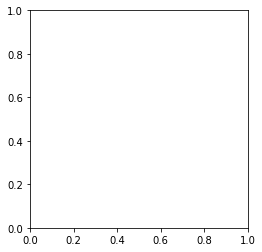

In [22]:
plt.pie(r['HTR'])